# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import sys
%load_ext autoreload
%autoreload 2
%matplotlib inline
!{sys.executable} -m pip install wandb
!pip -q install ./python

    100% |████████████████████████████████| 1.3MB 15.2MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 26.1MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 25.4MB/s ta 0:00:01
    100% |████████████████████████████████| 460kB 17.1MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 19.6MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 21.7MB/s a 0:00:01
    100% |████████████████████████████████| 71kB 22.9MB/s ta 0:00:01
    100% |████████████████████████████████| 256kB 29.3MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 21.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for nvidia-ml-py3 ... done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for watchdog ... done
  Stored in directory: /root/.cache/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31c42adb4e42b76495bc8f784c
  Running setup.py bdist_wheel for shortuuid ... d

load packages

In [2]:
import os
sys.path.append('files')

import torch
from datetime import datetime
def get_time(): return datetime.now().strftime("%Y-%d-%d_%H-%M-%S")
from collections import deque
import matplotlib.pyplot as plt

[autoreload of prompt_toolkit failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/conda/lib/python3.6/site-packages/prompt_toolkit/__init__.py", line 19, in <module>
    from .formatted_text import ANSI, HTML
  File "/opt/conda/lib/python3.6/site-packages/prompt_toolkit/formatted_text/__init_

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
os.listdir('/data/Reacher_Linux_NoVis')

['Reacher.x86', 'Reacher_Data', 'Reacher.x86_64']

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

#select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# PROJECT 2: CONTINUOUS CONTROL

### login with wandb

In [7]:
os.popen('wandb login b4325006f2643dff095f0551d0248ae8fcc77064').read()
import wandb

# Actor

![](images/nn_actor.svg)

# Cretic


![](images/nn_critic.svg)


# hyper parameters


 - lr_actor : learning rate of the actor
 - lr_critic : learning rate of the critic 
 - gamma : discount factor
 - weight_decay : L2 weight decay for the critic
 - tau : parameter for soft update of target parameters
 - learn_interval : learning interval 
 - learn_num : Amount of batches which we would like to learn (one after the other)
 - batch_size : number of episodes which we would like to use to train
 - buffer_size : number of episodes from which we can can sample of


In [12]:
import json
with open('hyper_parameters.json') as json_file:
    hyper_parameters = json.load(json_file)

# show the parameters
hyper_parameters

{'random_seed': 1,
 'learn_interval': 4,
 'learn_num': 1,
 'lr_actor': 0.001,
 'lr_critic': 0.001,
 'gamma': 0.99,
 'weight_decay': 0,
 'tau': 0.001,
 'batch_size': 512,
 'buffer_size': 100000}

# Agent

In [9]:
from agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents = 20, **hyper_parameters)

# Add the config to wandb    
wandb.init(config=agent.__dict__,project="udacity_deep-reinforcement-learning_project-2")
wandb.watch(agent.actor_local)
wandb.watch(agent.critic_local)

INFO:wandb.run_manager:system metrics and metadata threads started
INFO:wandb.run_manager:checking resume status, waiting at most 10 seconds
INFO:wandb.run_manager:resuming run from id: UnVuOnYxOjEwZ2VzdGprOnVkYWNpdHlfZGVlcC1yZWluZm9yY2VtZW50LWxlYXJuaW5nX3Byb2plY3QtMjp2ZXJiZWVtZW4=
INFO:wandb.run_manager:upserting run before process can begin, waiting at most 10 seconds
INFO:wandb.run_manager:saving patches
INFO:wandb.run_manager:saving pip packages
INFO:wandb.run_manager:initializing streaming files api
INFO:wandb.run_manager:unblocking file change observer, beginning sync with W&B servers


INFO:wandb.run_manager:shutting down system stats and metadata service
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/config.yaml
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/code/Continuous_Control.ipynb
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/requirements.txt
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_151608-10gestjk/code
INFO:wandb.run_manager:stopping streaming files an

# Train

In [10]:
def run_ddpg(n_episodes = 250, max_t=1000, print_every=100, save_every=100, checkpoint_name=f'checkpoint_{get_time()}'):
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    # for each episode
    for i_episode in range(1, n_episodes+1):
        
        # start a new episode
        environment_info = env.reset(train_mode=True)[brain_name]
        states = environment_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        # for max t steps in the episde
        for t in range(max_t):
            
            # get the actions from the agent, given a state
            actions = agent.action(states)
    
            
            # perform the action & receive the next state, reward and done
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
 
            # learn if the critereia are met
            agent.step(t, states, actions, rewards, next_states, dones)
            
            # prepare next state + save results
            states = next_states      
            score += rewards
            
            # if any of the agents is done, we stop :) 
            if np.any(dones):
                break
                
        # store the scores | Log
        mean_score = np.mean(score)
        
        # add to the queue
        scores_deque.append(mean_score)
        scores.append(mean_score)
        
        # show logs
        avg_score = np.mean(scores_deque)
        wandb.log({"Average Score": avg_score, "Mean Score": mean_score})
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}', end="")
        
        
   
        if i_episode % save_every == 0:
            agent.save_agent(f'{checkpoint_name}_{i_episode}')
        

        if i_episode % print_every == 0 or avg_score >= 30:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}')
        
        if avg_score >= 31.0:
            print(f'\r\nEnvironment is solved Episode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}')
            agent.save_agent(f'{checkpoint_name}_{i_episode}')
            break
            
    return scores

scores = run_ddpg()

INFO:wandb.run_manager:system metrics and metadata threads started
INFO:wandb.run_manager:checking resume status, waiting at most 10 seconds
INFO:wandb.run_manager:resuming run from id: UnVuOnYxOjEwZ2VzdGprOnVkYWNpdHlfZGVlcC1yZWluZm9yY2VtZW50LWxlYXJuaW5nX3Byb2plY3QtMjp2ZXJiZWVtZW4=
INFO:wandb.run_manager:upserting run before process can begin, waiting at most 10 seconds
INFO:wandb.run_manager:saving patches
INFO:wandb.run_manager:saving pip packages
INFO:wandb.run_manager:initializing streaming files api
INFO:wandb.run_manager:unblocking file change observer, beginning sync with W&B servers
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/config.yaml
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-2019

Episode 1	Average Score: 0.573, score: 0.573

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 2	Average Score: 0.366, score: 0.159

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 3	Average Score: 0.273, score: 0.087

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 4	Average Score: 0.21, score: 0.018

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 5	Average Score: 0.169, score: 0.007

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 6	Average Score: 0.148, score: 0.042

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 7	Average Score: 0.13, score: 0.022

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 8	Average Score: 0.122, score: 0.064

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 9	Average Score: 0.115, score: 0.062

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 10	Average Score: 0.107, score: 0.031

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 11	Average Score: 0.102, score: 0.055

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 12	Average Score: 0.1, score: 0.073

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 13	Average Score: 0.103, score: 0.143

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 14	Average Score: 0.12, score: 0.342

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 15	Average Score: 0.117, score: 0.08

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 16	Average Score: 0.114, score: 0.057

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 17	Average Score: 0.114, score: 0.113

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 18	Average Score: 0.124, score: 0.306

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 19	Average Score: 0.12, score: 0.04

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 20	Average Score: 0.128, score: 0.284

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 21	Average Score: 0.158, score: 0.754

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 22	Average Score: 0.181, score: 0.66

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 23	Average Score: 0.195, score: 0.502

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 24	Average Score: 0.217, score: 0.734

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 25	Average Score: 0.235, score: 0.654

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 26	Average Score: 0.272, score: 1.201

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 27	Average Score: 0.318, score: 1.508

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 28	Average Score: 0.357, score: 1.417

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 29	Average Score: 0.392, score: 1.375

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 30	Average Score: 0.412, score: 1.003

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 31	Average Score: 0.448, score: 1.518

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 32	Average Score: 0.489, score: 1.748

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 33	Average Score: 0.547, score: 2.408

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 34	Average Score: 0.595, score: 2.181

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 35	Average Score: 0.631, score: 1.861

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 36	Average Score: 0.672, score: 2.103

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 37	Average Score: 0.713, score: 2.19

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 38	Average Score: 0.743, score: 1.863

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 39	Average Score: 0.789, score: 2.51

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 40	Average Score: 0.793, score: 0.985

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 41	Average Score: 0.814, score: 1.618

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 42	Average Score: 0.865, score: 2.955

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 43	Average Score: 0.935, score: 3.912

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 44	Average Score: 1.008, score: 4.138

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 45	Average Score: 1.1, score: 5.158

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 46	Average Score: 1.207, score: 6.01

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 47	Average Score: 1.314, score: 6.212

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 48	Average Score: 1.424, score: 6.603

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 49	Average Score: 1.525, score: 6.4

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 50	Average Score: 1.615, score: 5.987

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 51	Average Score: 1.742, score: 8.123

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 52	Average Score: 1.9, score: 9.938

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 53	Average Score: 2.035, score: 9.064

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 54	Average Score: 2.225, score: 12.268

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 55	Average Score: 2.393, score: 11.481

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 56	Average Score: 2.607, score: 14.389

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 57	Average Score: 2.849, score: 16.408

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 58	Average Score: 3.129, score: 19.048

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 59	Average Score: 3.392, score: 18.676

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 60	Average Score: 3.706, score: 22.217

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 61	Average Score: 4.085, score: 26.81

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 62	Average Score: 4.46, score: 27.387

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 63	Average Score: 4.85, score: 29.011

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 64	Average Score: 5.257, score: 30.916

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 65	Average Score: 5.677, score: 32.541

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 66	Average Score: 6.091, score: 33.011

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 67	Average Score: 6.547, score: 36.638

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 68	Average Score: 6.976, score: 35.672

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 69	Average Score: 7.405, score: 36.635

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 70	Average Score: 7.831, score: 37.218

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 71	Average Score: 8.25, score: 37.591

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 72	Average Score: 8.665, score: 38.079

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 73	Average Score: 9.065, score: 37.881

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 74	Average Score: 9.454, score: 37.884

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 75	Average Score: 9.822, score: 37.052

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 76	Average Score: 10.183, score: 37.219

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 77	Average Score: 10.536, score: 37.405

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 78	Average Score: 10.887, score: 37.875

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 79	Average Score: 11.224, score: 37.515

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 80	Average Score: 11.548, score: 37.123

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 81	Average Score: 11.866, score: 37.318

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 82	Average Score: 12.182, score: 37.757

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 83	Average Score: 12.482, score: 37.131

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 84	Average Score: 12.777, score: 37.262

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 85	Average Score: 13.066, score: 37.341

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 86	Average Score: 13.343, score: 36.886

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 87	Average Score: 13.617, score: 37.186

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 88	Average Score: 13.883, score: 37.044

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 89	Average Score: 14.142, score: 36.899

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 90	Average Score: 14.399, score: 37.241

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 91	Average Score: 14.647, score: 36.954

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 92	Average Score: 14.881, score: 36.259

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 93	Average Score: 15.117, score: 36.796

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 94	Average Score: 15.347, score: 36.717

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 95	Average Score: 15.578, score: 37.265

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 96	Average Score: 15.802, score: 37.102

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 97	Average Score: 16.013, score: 36.255

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 98	Average Score: 16.229, score: 37.229

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 99	Average Score: 16.436, score: 36.745

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 100	Average Score: 16.64, score: 36.791

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 100	Average Score: 16.64, score: 36.791


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 101	Average Score: 17.001, score: 36.655

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 102	Average Score: 17.362, score: 36.27

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 103	Average Score: 17.729, score: 36.781

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 104	Average Score: 18.092, score: 36.339

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 105	Average Score: 18.453, score: 36.119

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 106	Average Score: 18.81, score: 35.688

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 107	Average Score: 19.17, score: 36.056

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 108	Average Score: 19.518, score: 34.905

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 109	Average Score: 19.874, score: 35.672

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 110	Average Score: 20.241, score: 36.672

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 111	Average Score: 20.602, score: 36.14

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 112	Average Score: 20.969, score: 36.772

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 113	Average Score: 21.328, score: 36.104

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 114	Average Score: 21.693, score: 36.851

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 115	Average Score: 22.059, score: 36.67

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 116	Average Score: 22.413, score: 35.44

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 117	Average Score: 22.764, score: 35.148

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 118	Average Score: 23.117, score: 35.612

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 119	Average Score: 23.467, score: 35.085

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 120	Average Score: 23.822, score: 35.819

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 121	Average Score: 24.172, score: 35.73

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 122	Average Score: 24.525, score: 35.938

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 123	Average Score: 24.884, score: 36.375

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 124	Average Score: 25.231, score: 35.419

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 125	Average Score: 25.574, score: 34.988

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 126	Average Score: 25.906, score: 34.437

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 127	Average Score: 26.232, score: 34.05

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 128	Average Score: 26.567, score: 34.907

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 129	Average Score: 26.905, score: 35.204

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 130	Average Score: 27.246, score: 35.092

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 131	Average Score: 27.583, score: 35.29

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 132	Average Score: 27.919, score: 35.288

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 133	Average Score: 28.257, score: 36.179

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 135	Average Score: 28.926, score: 35.833

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 136	Average Score: 29.279, score: 37.397

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json


Episode 137	Average Score: 29.616, score: 35.917

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 138	Average Score: 29.963, score: 36.545

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 139	Average Score: 30.294, score: 35.574


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Episode 140	Average Score: 30.644, score: 36.058


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl


Episode 141	Average Score: 30.982, score: 35.42


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json
INFO:wandb.run_manager:shutting down system stats and metadata service


Episode 142	Average Score: 31.319, score: 36.566

Environment is solved Episode 142	Average Score: 31.319, score: 36.566


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-events.jsonl
INFO:wandb.run_manager:stopping streaming files and file change observer
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_151608-10gestjk/wandb-metadata.json


Text(0.5,0,'Episode #')

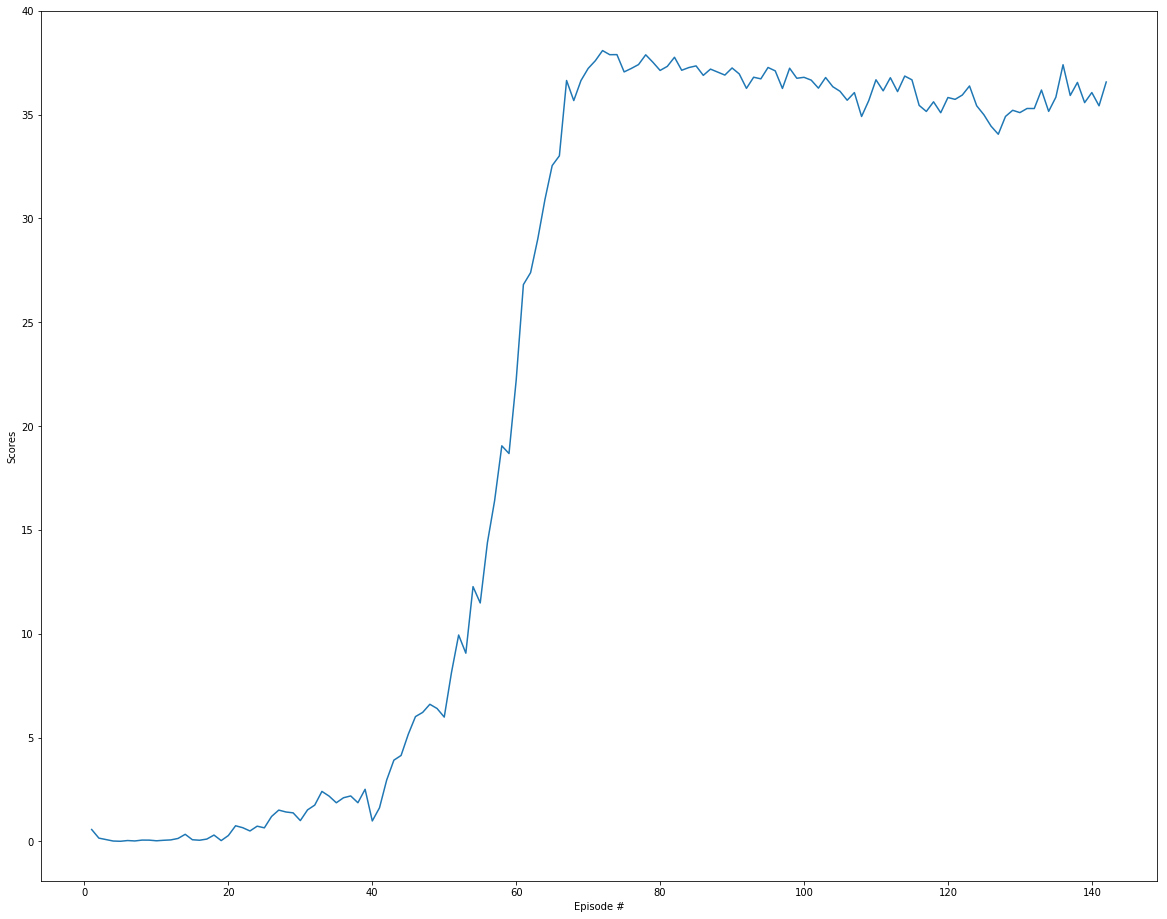

In [11]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')

![title](images/algorithm.png)